# CLEAR offline model

This is the same lattice as the CLEAR online model, but offline.

Closely based on `onlineTool/onlineModel.py`

In [1]:
import sys
sys.path.append("../.")
import CLEARview
import numpy as np
import matplotlib.pyplot as plt

In [2]:
P0 = 200.0 #[MeV/c]
m0c2 = 0.511 #[MeV]
E0 = np.sqrt(m0c2**2 + P0**2) # [MeV]

epsN_x = 10.0 #[um]
epsN_y = 10.0 #[um]
beta0_x = 2.0 #[m]
beta0_y = 2.0 #[m]
alpha0_x = 0.0
alpha0_y = 0.0

x0  = 0.0 #[mm]
y0  = 0.0 #[1e-3]
xp0 = 0.0 #[mm]
yp0 = 0.0 #[1e-3]

In [3]:
epsx_g = CLEARview.opticsUtils.get_eps_g(epsN_x,E0)
epsy_g = CLEARview.opticsUtils.get_eps_g(epsN_y,E0)

In [4]:
sys.path.append("../lattices/.")
import clearST_survey0_tfs #get the lattice
lattice = clearST_survey0_tfs.buildLattice(P0)

In [5]:
#%matplotlib notebook

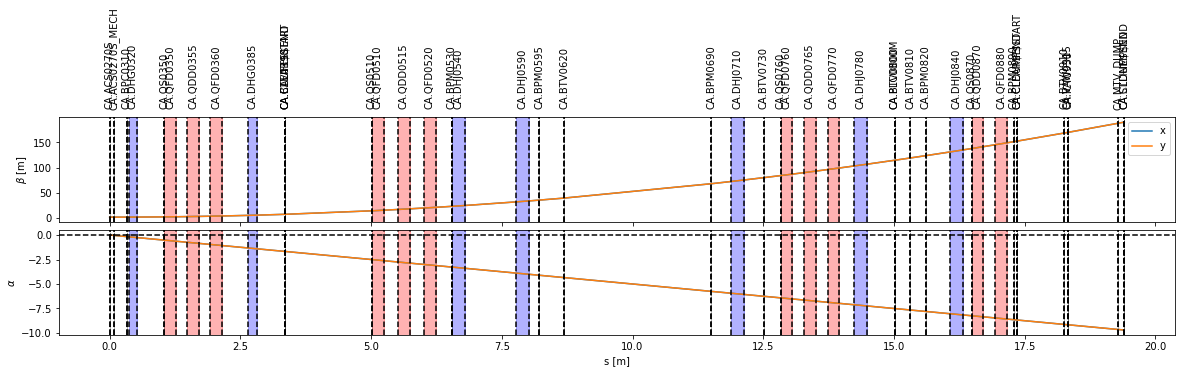

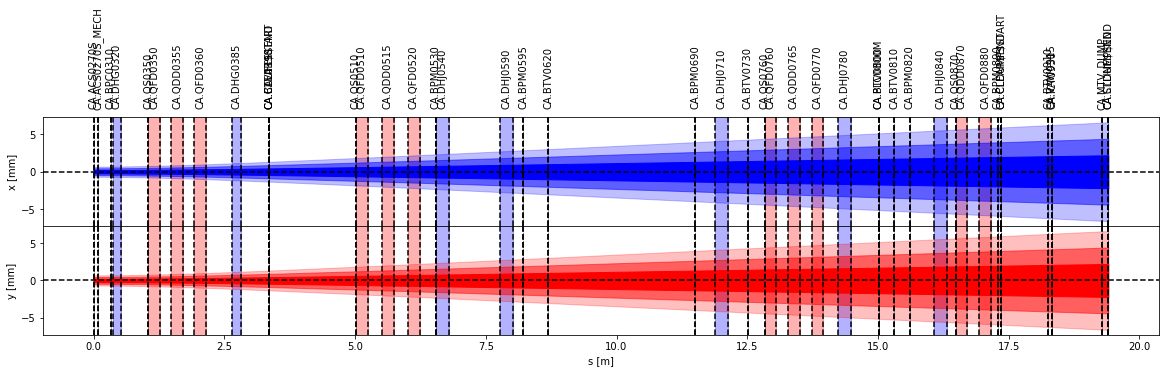

In [6]:
xt0 = np.asarray([beta0_x,alpha0_x,CLEARview.opticsUtils.getGamma(alpha0_x,beta0_x)])
yt0 = np.asarray([beta0_y,alpha0_y,CLEARview.opticsUtils.getGamma(alpha0_y,beta0_y)])

(s,xt,yt, xTra,yTra) = lattice.computeTwiss(xt0,yt0)
(ax_beta,ax_alpha) = CLEARview.plot.alphaBeta(s,xt,yt)
CLEARview.plot.addElemsToPlot(ax_beta,lattice)
CLEARview.plot.addElemsToPlot(ax_alpha,lattice)
CLEARview.plot.addElemNamesToPlot(ax_beta,lattice, ypos=1.1)
plt.gcf().set_figwidth(20)

## Let's plot the beam sigmas!
(ax1,ax2) = CLEARview.plot.sigmas(s,xt,yt,(epsx_g,epsy_g), xTra,yTra)
CLEARview.plot.addElemsToPlot(ax1,lattice)
CLEARview.plot.addElemsToPlot(ax2,lattice)
CLEARview.plot.addElemNamesToPlot(ax1,lattice, ypos=1.1)
plt.gcf().set_figwidth(20)

plt.show()

In [7]:
# Let's set the magnet currents [A] with some hard-coded element currents for demonstration purposes

lattice.elements['CA.DHG0320'].update( 0, 0, P0)

lattice.elements['CA.QFD0350'].update( 20.0, P0)
lattice.elements['CA.QDD0355'].update(-40.0, P0)
lattice.elements['CA.QFD0360'].update( 20.0, P0)

lattice.elements['CA.DHG0385'].update( 0, 0, P0)

lattice.elements['CA.QFD0510'].update( 33.0, P0)
lattice.elements['CA.QDD0515'].update(-66.0, P0)
lattice.elements['CA.QFD0520'].update( 33.0, P0)

lattice.elements['CA.DHJ0540'].update( 0, 0, P0)
lattice.elements['CA.DHJ0590'].update( 0, 0, P0)
lattice.elements['CA.DHJ0710'].update( 0, 0, P0)

lattice.elements['CA.QFD0760'].update( 50.0,  P0)
lattice.elements['CA.QDD0765'].update(-100.0, P0)
lattice.elements['CA.QFD0770'].update( 60.0,  P0)

lattice.elements['CA.DHJ0780'].update( 0, 0, P0)
lattice.elements['CA.DHJ0840'].update( 10, 10, P0)

lattice.elements['CA.QDD0870'].update(-120.0, P0)
lattice.elements['CA.QFD0880'].update( 200.0, P0)
#lattice.elements['CA.QDD0920'].update(-200.0, P0)



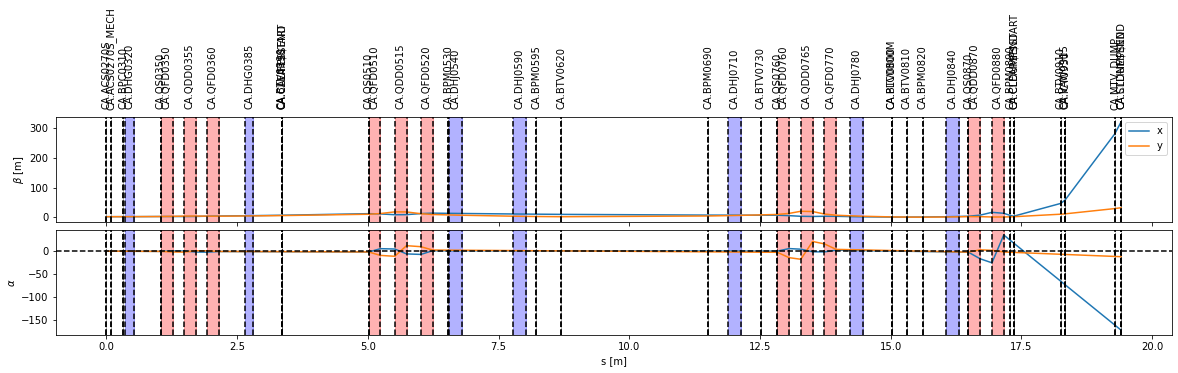

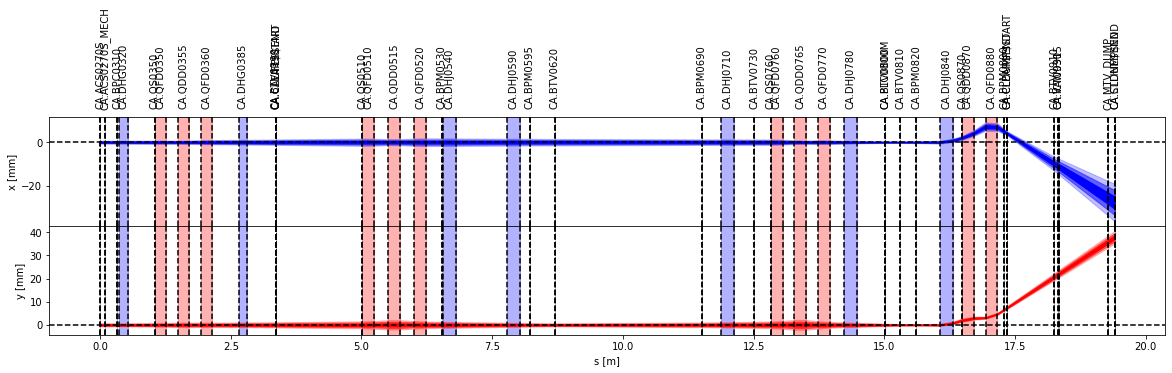

In [8]:
xt0 = np.asarray([beta0_x,alpha0_x,CLEARview.opticsUtils.getGamma(alpha0_x,beta0_x)])
yt0 = np.asarray([beta0_y,alpha0_y,CLEARview.opticsUtils.getGamma(alpha0_y,beta0_y)])
(s,xt,yt, xTra,yTra) = lattice.computeTwiss(xt0,yt0)


(ax_beta,ax_alpha) = CLEARview.plot.alphaBeta(s,xt,yt)
CLEARview.plot.addElemsToPlot(ax_beta,lattice)
CLEARview.plot.addElemsToPlot(ax_alpha,lattice)
CLEARview.plot.addElemNamesToPlot(ax_beta,lattice, ypos=1.1)
plt.gcf().set_figwidth(20)

## Let's plot the beam sigmas!
(ax1,ax2) = CLEARview.plot.sigmas(s,xt,yt,(epsx_g,epsy_g), xTra,yTra)
CLEARview.plot.addElemsToPlot(ax1,lattice)
CLEARview.plot.addElemsToPlot(ax2,lattice)
CLEARview.plot.addElemNamesToPlot(ax1,lattice, ypos=1.1)
plt.gcf().set_figwidth(20)

plt.show()

In [9]:
# Let's also print the twiss parameters and the sigmas
sigx = np.sqrt(xt[0,:]*epsx_g*1e-6)*1e3 #[mm]
sigy = np.sqrt(yt[0,:]*epsy_g*1e-6)*1e3 #[mm]

print('#  s[m] element_name         typeName            betax[m] betay[m]         alphax[m]        alphay[m] sigmax[mm] sigmay[mm]    x[mm]    y[mm]    dx/ds[1e-3]    dy/ds[1e-3]')
print('###########################################################################################################################################################################')

i=0
print (f'{0.0:7.5} {"START":20} {"-----":20} {xt[0,i]:7.5}  {yt[0,i]:7.5}   {xt[1,i]:15.5}  {yt[1,i]:15.5}    {sigx[i]:7.5}    {sigy[i]:7.5} {xTra[0,i]*1e3:8.5} {yTra[0,i]*1e3:8.5}       {xTra[1,i]*1e3:8.5}       {yTra[1,i]*1e3:8.5}')

for i,ek in zip(range(1,len(s)),lattice.elements.keys()):
    print (f'{s[i]:7.5} {ek:20} {lattice.elements[ek].typeName:20} {xt[0,i]:7.5}  {yt[0,i]:7.5}   {xt[1,i]:15.5}  {yt[1,i]:15.5}    {sigx[i]:7.5}    {sigy[i]:7.5} {xTra[0,i]*1e3:8.5} {yTra[0,i]*1e3:8.5}       {xTra[1,i]*1e3:8.5}       {yTra[1,i]*1e3:8.5}')

#  s[m] element_name         typeName            betax[m] betay[m]         alphax[m]        alphay[m] sigmax[mm] sigmay[mm]    x[mm]    y[mm]    dx/ds[1e-3]    dy/ds[1e-3]
###########################################################################################################################################################################
    0.0 START                -----                    2.0      2.0               0.0              0.0     0.2262     0.2262      0.0      0.0            0.0            0.0
    0.0 CA.ACS0270S          Marker                   2.0      2.0               0.0              0.0     0.2262     0.2262      0.0      0.0            0.0            0.0
 0.0865 drift_0              Drift                 2.0037   2.0037          -0.04325         -0.04325    0.22641    0.22641      0.0      0.0            0.0            0.0
 0.0865 CA.ACS0270S_MECH     Marker                2.0037   2.0037          -0.04325         -0.04325    0.22641    0.22641      0.0      0.